# Preprocessing

To choose the perfect beer we want to analyze the impact of alcohol concentration on popularity of a beer. We want to analyze the following research question: Does the alcohol content lead to a perceiveable change in ratings or review sentiment?

In [10]:
# imports
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

General Preprocessing for dataset

In [59]:
# loading the ratings dataset 

ratings_ba_df = pd.read_csv('data/BeerAdvocate/ratings_BA.csv')
ratings_rb_df = pd.read_csv('data/RateBeer/ratings_RB.csv')

# loading the beers dataset

beers_ba_df = pd.read_csv('data/BeerAdvocate/beers.csv')
beers_rb_df = pd.read_csv('data/RateBeer/beers.csv')

In [60]:
# Convert the date column to datetime format for BeerAdvocate
ratings_ba_df['date'] = pd.to_datetime(ratings_ba_df['date'], unit='s')
ratings_ba_df['year'] = ratings_ba_df['date'].dt.year
ratings_ba_df['month'] = ratings_ba_df['date'].dt.month

# Convert the date column to datetime format for RateBeer
ratings_rb_df['date'] = pd.to_datetime(ratings_rb_df['date'], unit='s')
ratings_rb_df['year'] = ratings_rb_df['date'].dt.year
ratings_rb_df['month'] = ratings_rb_df['date'].dt.month

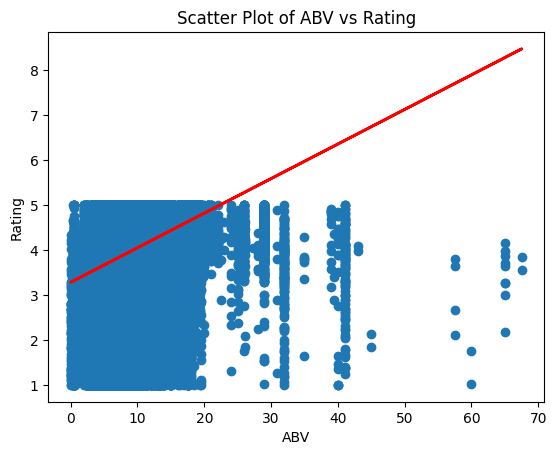

Correlation Coefficient: 0.3005760482059104


In [13]:
# Create a new DataFrame by merging only the required columns based on 'beer_id'
merged_df = ratings_ba_df[['rating', 'beer_id']].merge(beers_ba_df[['beer_id', 'abv']], on='beer_id', how='left')

# Drop rows with NaN values in 'abv'
merged_df = merged_df.dropna(subset=['abv'])

# Create a scatter plot
plt.scatter(merged_df['abv'], merged_df['rating'])
plt.title('Scatter Plot of ABV vs Rating')
plt.xlabel('ABV')
plt.ylabel('Rating')

# Perform linear regression
X = merged_df[['abv']]
y = merged_df['rating']

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Plot the regression line
plt.plot(X, slope * X + intercept, color='red', linewidth=2)

# Display the plot
plt.show()

# Output the correlation coefficient
correlation_coefficient = np.corrcoef(merged_df['abv'], merged_df['rating'])[0, 1]
print(f"Correlation Coefficient: {correlation_coefficient}")


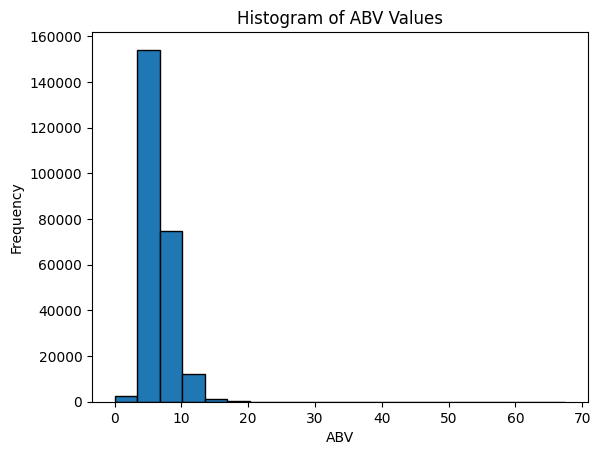

In [14]:

# Drop NaN values in 'abv' column
abv_values = beers_ba_df['abv'].dropna()

# Create a histogram
plt.hist(abv_values, bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Histogram of ABV Values')
plt.xlabel('ABV')
plt.ylabel('Frequency')

# Display the plot
plt.show()

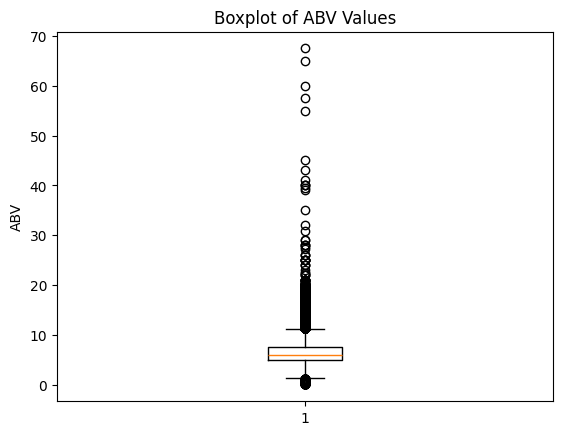

0         4.7
1         3.8
2         4.8
3         4.0
4         4.5
         ... 
280816    5.6
280817    6.8
280818    5.0
280819    5.3
280821    7.0
Name: abv, Length: 244799, dtype: float64

In [15]:
# Drop NaN values in 'abv' column
abv_values = beers_ba_df['abv'].dropna()

# Create a boxplot
plt.boxplot(abv_values)
plt.title('Boxplot of ABV Values')
plt.ylabel('ABV')

# Display the plot
plt.show()
display(beers_ba_df['abv'].dropna())

In [16]:
# Display number of beers with high abv scores
# Define the ABV thresholds
abv_thresholds = [15, 20, 30, 40, 50, 60, 70]

# Count the number of beers above each threshold
for threshold in abv_thresholds:
    count_above_threshold = (beers_ba_df['abv'] > threshold).sum()
    print(f"Number of beers above {threshold} ABV: {count_above_threshold}")


Number of beers above 15 ABV: 551
Number of beers above 20 ABV: 55
Number of beers above 30 ABV: 16
Number of beers above 40 ABV: 8
Number of beers above 50 ABV: 5
Number of beers above 60 ABV: 2
Number of beers above 70 ABV: 0


In [17]:
# analyzing why some abv scores are that high
# Filter the DataFrame to get examples with ABV over 40
high_abv_examples = beers_ba_df[beers_ba_df['abv'] > 40]

# Display the examples
print("Examples with ABV over 40:")
print(high_abv_examples.head())

Examples with ABV over 40:
       beer_id                      beer_name  brewery_id  brewery_name  \
2010     57015             Sink The Bismarck!       16315       BrewDog   
2021    133448             The End Of History       16315       BrewDog   
2050     89801                     Armageddon       30178   Brewmeister   
2059    104620                    Snake Venom       30178   Brewmeister   
41539    57856  Schorschbräu Schorschbock 43%        6513  Schorschbräu   

                                style  nbr_ratings  nbr_reviews   avg  \
2010   American Double / Imperial IPA          220          100  3.56   
2021                          Eisbock            2            0  3.88   
2050                          Eisbock           18            8  3.36   
2059               English Barleywine            6            2  3.68   
41539                         Eisbock            2            2  4.03   

       ba_score  bros_score   abv  avg_computed    zscore  \
2010       81.0       

[Snake Venom](https://www.fooddive.com/news/strongest-beer-in-the-world-snake-venom-sports-675-abv/185830/)
 is officially the world's strongest beer at an abv of 67.5 

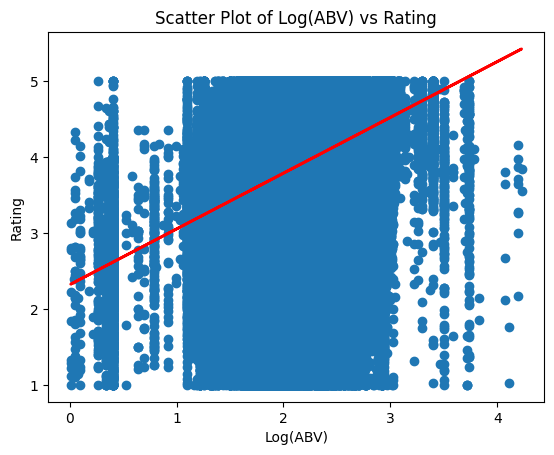

Correlation Coefficient: 0.32682683280116637


In [18]:
# decrease the effect of the outliers

# Merge the two DataFrames
merged_df = ratings_ba_df[['rating', 'beer_id']].merge(beers_ba_df[['beer_id', 'abv']], on='beer_id', how='left')

# Drop rows with NaN values in 'abv'
merged_df = merged_df.dropna(subset=['abv'])

# Apply a logarithmic transformation to 'abv'
merged_df['log_abv'] = np.log1p(merged_df['abv'])

# Create a scatter plot with the transformed 'abv'
plt.scatter(merged_df['log_abv'], merged_df['rating'])
plt.title('Scatter Plot of Log(ABV) vs Rating')
plt.xlabel('Log(ABV)')
plt.ylabel('Rating')

# Perform linear regression on the transformed data
X = merged_df[['log_abv']]
y = merged_df['rating']

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Plot the regression line on the transformed data
plt.plot(X, slope * X + intercept, color='red', linewidth=2)

# Display the plot
plt.show()

# Output the correlation coefficient
correlation_coefficient = np.corrcoef(merged_df['log_abv'], merged_df['rating'])[0, 1]
print(f"Correlation Coefficient: {correlation_coefficient}")

In [19]:
import statsmodels.api as sm
from sklearn.linear_model import HuberRegressor

# Assuming you have a DataFrame named merged_df with columns 'rating' and 'abv'

# Filter the data to keep ratings between 0 and 5 and ABV between 0 and 70
filtered_df = merged_df[(merged_df['rating'] >= 0) & (merged_df['rating'] <= 5) & (merged_df['abv'] >= 0) & (merged_df['abv'] <= 70)]

# Perform robust regression using Huber Regressor
X = sm.add_constant(filtered_df['abv'])  # Add a constant term for the intercept
y = filtered_df['rating']

# Fit the model
model = HuberRegressor()
model.fit(X, y)

# Print the summary statistics
print(sm.OLS(y, X).fit().summary())


                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                 2.629e+05
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        11:17:20   Log-Likelihood:            -2.3306e+06
No. Observations:             2647205   AIC:                         4.661e+06
Df Residuals:                 2647203   BIC:                         4.661e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2821      0.001   2885.393      0.0

The regression results indicate the following:

- **Correlation Coefficient:** 0.3268
- **R-squared:** 0.090 (proportion of the variance in the dependent variable explained by the independent variable)
- **P-values for Coefficients:**
  - **const (Intercept):** \(3.2821\) (p-value < 0.001)
  - **abv (Slope):** \(0.0769\) (p-value < 0.001)

**Interpretation:**

1. **Correlation Coefficient:** The correlation coefficient of 0.3268 indicates a positive correlation between ABV and rating. However, it's a relatively weak correlation.

2. **R-squared:** The R-squared value of 0.090 suggests that only a small proportion (9%) of the variance in the rating can be explained by the ABV.

3. **P-values for Coefficients:**
   - The p-value for the constant (intercept) is extremely small (p < 0.001), suggesting that the intercept is significantly different from zero.
   - The p-value for ABV is also extremely small (p < 0.001), indicating that the ABV coefficient is significantly different from zero. This suggests that ABV has a statistically significant influence on the rating.

Overall, while there is a statistically significant influence of ABV on the rating, the R-squared value suggests that ABV alone explains only a small portion of the variability in the rating.

#### ToDo

Match les deux dataset pour les bières<br>

analyse par mois<br>
quel pourcentage est le plus préféré

2 analyses:<br>
--> quelle est le pourcentage préf (par mois)<br>
--> quelle est la bière préf (par mois) --> extraire pourcentage et comparer<br>
----> définir un type de bière avec un certain pourcentage optimal par mois

à chaque fois prouver et justifier (montrer quoi trouvé et pourqoui)

esq style a son pourventage ou juste chaque bière


le dataset final (justifié) va être matché pour les styles, mais il y a tjrs les binchs individuelles

13.12.23

In [46]:
## load users dataset for US filter

users_ba_df = pd.read_csv('data/BeerAdvocate/users.csv')
users_rb_df = pd.read_csv('data/RateBeer/users.csv')

In [61]:
## ------------------ location modif --------------------- ##

users_rb_df['location'] = users_rb_df['location'].str.split(',').str[0]
users_ba_df['location'] = users_ba_df['location'].str.split(',').str[0]

## ------------------  filtrage US users ----------------- ##

US_country = 'United States'

# keep only the rows where the user country is United States
users_ba_df = users_ba_df[users_ba_df.location == US_country]
users_rb_df = users_rb_df[users_rb_df.location == US_country]

## ------------------  filtrage US reviews --------------- ##

# merge the ratings and users data frames to get the location of the user for each rating
ratings_users_ba_df = pd.merge(ratings_ba_df, users_ba_df[['user_id', 'location']], on='user_id', how='inner')
ratings_users_rb_df = pd.merge(ratings_rb_df, users_rb_df[['user_id', 'location']], on='user_id', how='inner')

# filter the ratings dataframes to only keep the ratings of the users from the US
ratings_ba_df = ratings_users_ba_df[ratings_users_ba_df.location == US_country]
ratings_ba_df.drop('location', axis=1, inplace=True)
ratings_rb_df = ratings_users_rb_df[ratings_users_rb_df.location == US_country]
ratings_rb_df.drop('location', axis=1, inplace=True)

# merge the two ratings data frames
ratings_combined_df = pd.concat([ratings_ba_df, ratings_rb_df], ignore_index=True)

In [63]:
# Create a dictionary mapping beer_id to abv
abv_mapping = beers_ba_df.set_index('beer_id')['abv'].to_dict()

# Map the abv values to the ratings_combined_df using the beer_id
ratings_combined_df['abv'] = ratings_combined_df['beer_id'].map(abv_mapping)

,beer_name,beer_id,brewery_id,brewery_name,style,date,user_id,user_name,appearance,aroma,palate,taste,overall,rating,text,year,month,abv
0,Régab,142544,37262,Societe des Brasseries du Gabon (SOBRAGA),Euro Pale Lager,2015-08-20 10:00:00,nmann08.184925,nmann08,3.25,2.75,3.25,2.75,3.0,2.88,"From a bottle, pours a piss yellow color with ...",2015,8,4.5
1,Americano Imperial Coffee IPA,131646,31221,Siren Craft Brew,English India Pale Ale (IPA),2014-08-29 10:00:00,nmann08.184925,nmann08,NaN,NaN,NaN,NaN,NaN,3.50,"On draft, pours a dark brown with red hues, wi...",2014,8,9.1
2,Broken Dream,99556,31221,Siren Craft Brew,Milk / Sweet Stout,2014-08-29 10:00:00,nmann08.184925,nmann08,NaN,NaN,NaN,NaN,NaN,4.00,"On draft, pours an opaque black with a light b...",2014,8,6.5
3,Maiden 2013,127138,31221,Siren Craft Brew,English Barleywine,2014-08-29 10:00:00,nmann08.184925,nmann08,NaN,NaN,NaN,NaN,NaN,3.75,"On draft, pours a translucent but very dark re...",2014,8,11.1
4,Shattered Dream,135343,31221,Siren Craft Brew,Russian Imperial Stout,2014-08-29 10:00:00,nmann08.184925,nmann08,NaN,NaN,NaN,NaN,NaN,4.00,"On draft, pours a dark brown, pretty much opaq...",2014,8,10.0


In [64]:
# temporal analysis of alc percentage for months yearly plot

# create a year_month column
ratings_combined_df['year_month'] = ratings_combined_df['year'].astype(str) + '-' + ratings_combined_df['month'].astype(str)

# convert the year_month column to datetime format
ratings_combined_df['year_month'] = pd.to_datetime(ratings_combined_df['year_month'])

# Group by year_month and calculate the average ABV for each month
average_month_abv = ratings_combined_df.groupby('year_month')['abv'].mean()

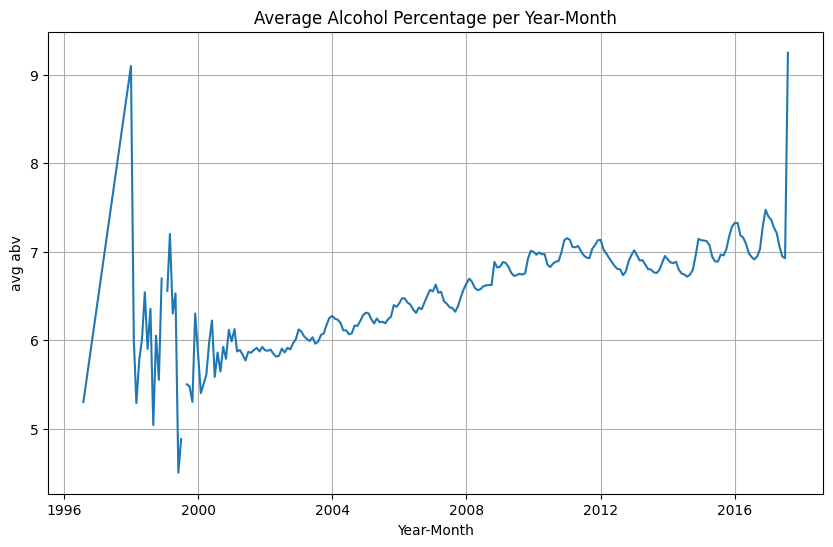

In [67]:
# Yearly plot of the number of ratings
plt.figure(figsize=(10, 6))
plt.plot(average_month_abv)
plt.title('Average Alcohol Percentage per Year-Month')
plt.xlabel('Year-Month')
plt.grid()
plt.ylabel('avg abv')
plt.show()

We can observe a fluctuation depending on the month and a general temporal tendency

# do the same for just every month